In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

C:\Users\christine\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Create dataframe from the given dataset in the url.
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


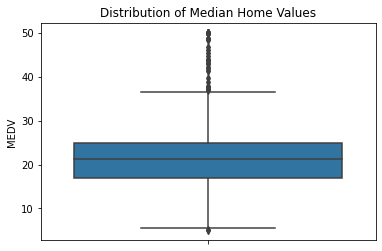

In [5]:
# Boxplot for MEDV
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Distribution of Median Home Values')
plt.show()

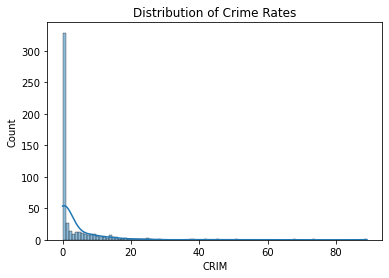

In [6]:
# Histogram for CRIM
sns.histplot(boston_df['CRIM'], kde=True)
plt.title('Distribution of Crime Rates')
plt.show()

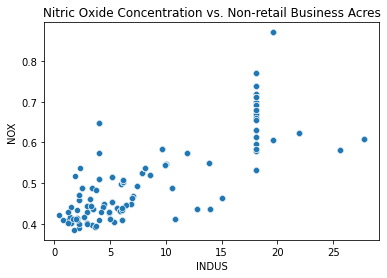

In [7]:
# Scatter plot for NOX vs. INDUS
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric Oxide Concentration vs. Non-retail Business Acres')
plt.show()

In [8]:
# T-test for CHAS (Near or Far from Charles River)
from scipy.stats import ttest_ind
far_houses = boston_df[boston_df['CHAS'] == 0]['MEDV']
near_houses = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_val = ttest_ind(far_houses, near_houses)
print(f'T-statistic: {t_stat}, P-value: {p_val}')

T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05


In [9]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [10]:
# Perform ANOVA
model = ols('MEDV ~ AGE', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [11]:
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Pearson correlation: {correlation}, P-value: {p_value}')

Pearson correlation: 0.7636514469209151, P-value: 7.913361061238693e-98


In [12]:
X = boston_df[['CRIM', 'NOX', 'RM']]
y = boston_df['MEDV']
X = sm.add_constant(X)  # Add constant term to the model

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     216.0
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           5.85e-90
Time:                        18:55:32   Log-Likelihood:                -1630.5
No. Observations:                 506   AIC:                             3269.
Df Residuals:                     502   BIC:                             3286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.1326      3.244     -5.897      0.0